# Cuarto Examen Parcial <img src="fcfm.png" style="width: 80px;" style="float: right;"  align="right"  margin-right= "50px"/>

031 A2023 Estadística 

Dr. Álvaro Eduardo Cordero Franco

Ismael Sandoval Aguilar 

13 de noviembre de 2023

1. Nos interesa el tiempo de coagulación (en minutos) del plasma sanguíneo para 3 tratamientos y 2 concentraciones de adrenalina mezclada con el plasma. Para cada combinación de tratamiento y concentración de adrenalina, se tomaron 3 observaciones independientes. Se obtuvieron los siguientes datos (a mano o en R): 

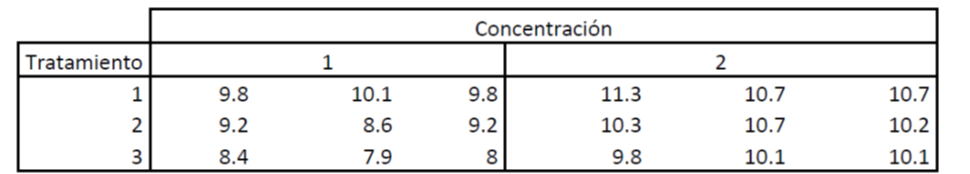

- ¿Qué puede concluir de este experimento? 

Se trata de una prueba una prueba ANOVA con dos factores, donde:

- Unidad de análisis: el individuo al que se le realizó el tratamiento. 
- Variable dependiente: tiempo de coagulación.

Factores:

- Tratamiento (tres niveles): tres tratamientos.
- Concentración (dos niveles): dos concentraciones de adrenalina mezclada con el plasma.

- Formule sus hipótesis estadísticas y prácticas, haga sus pruebas estadísticas y concluya en forma estadística y práctica. 

In [ ]:
library(tidyverse)

In [48]:
# Abrir archivo
data_1 <- read.csv("blood_data.csv")

# Crear modelo ANOVA
anova_1 <- aov(Tiempo ~ Tratamiento * Concentracion, data = data_1)

El ANOVA tiene que cumplir con los siguientes supuestos:

- Independencia de las observaciones.
- Normalidad en los residuos.
- Homocedasticidad.

Vamos a asumir que todas observaciones son independientes. Para verificar que los residuos sean normales, realizamos una prueba de Shapiro-Wilk donde se busca contrastar:

- $H_0: \epsilon \sim \mathcal{N}(\mu,\sigma^2)$
- $H_1: \epsilon \nsim \mathcal{N}(\mu,\sigma^2)$

con un nivel de significancia $\alpha = 0.05$


In [49]:
# Prueba de Shapiro-Wilk
shapiro.test(residuals(anova_1))


	Shapiro-Wilk normality test

data:  residuals(anova_1)
W = 0.93104, p-value = 0.2025


Ya que el p-valor es mayor a $\alpha$ existe evidencia suficiente para no rechazar $H_0$. Es decir, los residuos del modelo siguen una distribución normal. Ahora bien, para verificar la homogeneidad de las varianzas vamos a utilizar la prueba de Levene donde se busca contrastar:

- $H_0$: $\sigma^2_1 = \sigma^2_2 = ... \sigma^2_n$
- $H_1$: al menos una de las varianzas es distinta.

con un nivel de significancia $\alpha = 0.05$

In [ ]:
library(car)

In [50]:
# Prueba de Levene
leveneTest(Tiempo ~ interaction(Tratamiento, Concentracion), data = data_1)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,0.09655172,0.9909953
,12,NA,NA


Ya que el p-valor es mayor a $\alpha$ existe evidencia suficiente para no rechazar $H_0$. Es decir, todas las varianzas del modelo son iguales.

Ya que se cumplen todos los supuestos, podemos continuar con el ANOVA. Se busca contrastar:

El promedio del tiempo de coagulación es el mismo:

- $H_0$: entre cada tratamiento.
- $H_0$: entre cada concentración.
- $H_0$: entre la interacción de ambos factores.

Al menos uno de los promedios del tiempo de coagulación es diferente:

- $H_1$: entre cada tratamiento.
- $H_1$: entre cada concentración.
- $H_1$: entre la interacción de ambos factores.

Con un nivel de significancia $\alpha = 0.05$.

In [51]:
summary(anova_1)

                          Df Sum Sq Mean Sq F value   Pr(>F)    
Tratamiento                1  5.468   5.468   86.49 2.28e-07 ***
Concentracion              1  9.245   9.245  146.25 8.47e-09 ***
Tratamiento:Concentracion  1  0.608   0.608    9.61  0.00783 ** 
Residuals                 14  0.885   0.063                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

De acuerdo a la tabla anterior, existe evidencia suficiente para decir que hay diferencias significativas en el tiempo medio de coagulación:

- Entre cada tratamiento.
- Entre cada concentración.
- Entre la interacción de ambos factores.

Ya que el p-valor de los tres casos es menor a $\alpha$. Es decir, se rechazan todas las hipótesis nulas.

2.	Cuando los supuestos de normalidad y homogeneidad de varianzas (varianzas iguales) no se cumplen para el ANOVA, se sugiere hacer una prueba no paramétrica llamada Kruskal-Wallis. En esta prueba se toman todos los datos como si fueran una misma muestra y se cambian los datos por su ranking. Luego se realiza el mismo ANOVA con los rankings en lugar de los datos. Utilice esta prueba para el siguiente problema (hacerlo en R o Python, pero generando su código, no utilizando funciones estadísticas creadas): 

    A tres grupos de conejillos de india se les inyectó, respectivamente, 0.5, 1.0, y 1.5 miligramos de un tranquilizante, y a continuación se muestra el número de segundos que tardaron en dormirse. Realice una prueba de Krustal-Wallis con un nivel de significancia de 0.01 para probar si existen diferencias significativas en el periodo que tardan los conejillos de indias en dormirse.

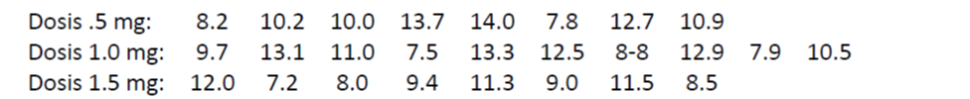



In [111]:
# Carga del archivo
data_2 <- read.csv("dose_data.csv")

Se busca contrastar:

- $H_0$: $\mu_1 = \mu_2 = \mu_3$
- $H_1$: al menos una de las medias es distinta.

con un nivel de significancia $\alpha = 0.01$.

In [159]:
# Convierte el dataframe en un vector y obtiene los rangos
ranked_data <- rank(as.vector(as.matrix(data_2)), ties.method = c("average"), na.last = NA)

# Calcula los grupos
tc_1 <- (sum(ranked_data[1:8]) ^ 2) / 8
tc_2 <- (sum(ranked_data[9:18]) ^ 2) / 10
tc_3 <- (sum(ranked_data[19:26]) ^ 2) / 8

# Sumatoria de los grupos
sum_groups <- tc_1 + tc_2 + tc_3

# Total de participantes
total_participants <- prod(dim(data_2)) - sum(is.na(data_2))

# Calcula el estadistico H
h_test <- (12 / (total_participants * (total_participants + 1))) * sum_groups - 3 * (total_participants + 1)

# Calcula el p-valor dado H
p_value <- 1 - pchisq(h_test, 2)

p_value

[1] 0.4644598

Ya que el p-valor es mayor a $\alpha$, no existe evidencia suficiente para rechazar la hipótesis nula. Es decir, no existen diferencias significativas en el periodo que tardan los conejillos de indias en dormirse entre los grupos.


3.	Realice un ANOVA de 2 factores con interacción (usando funciones estadísticas de R o Python) para Ames Housing Dataset (kaggle.com), tomando como variable de salida el precio de venta (SalePrice) y de entrada o factores SeasonOfYear y Heating_QC. ¿Qué puede concluir?

In [160]:
# Lectura del archivo
data_3 <- read.csv("AmesHousing.csv")

In [153]:
# Creacion del modelo
anova_3 <- aov(data_3$SalePrice ~ data_3$Mo_Sold * data_3$Heating_QC, data = data_3)

Utilizaremos la prueba de Shapiro-Wilk para verificar la normalidad de los residuos del modelo con un nivel de significancia $\alpha = 0.05$.

In [155]:
# Prueba de Shapiro-Wilk
shapiro.test(residuals(anova_3))


	Shapiro-Wilk normality test

data:  residuals(anova_3)
W = 0.89463, p-value < 2.2e-16


Ya que el p-valor es menor a $\alpha$, existe evidencia suficiente para rechazar $H_0$. Es decir, los residuos del modelo no siguen una distribución normal. Ahora, utilizaremos la prueba de Levene para verificar la homocedasticidad del modelo con el mismo nivel de significancia de la prueba anterior.

In [158]:
# Prueba de Levene
leveneTest(SalePrice ~ interaction(Mo_Sold, Heating_QC), data = data_3)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,49,5.751697,1.679988e-32
,2880,NA,NA


Nuevamente, el p-valor es menor a $\alpha$, por lo que existe evidencia suficiente para rechazar $H_0$. Es decir, no existe homocedasticidad en el modelo. Ya que dos de los supuestos no se cumplen (se asume que existe independencia en las observaciones), no es recomendable continuar con el análisis, pues los resultados generados por el modelo podrían ser erróneos.

In [154]:
summary(anova_3)

                                   Df    Sum Sq   Mean Sq F value Pr(>F)    
data_3$Mo_Sold                      1 2.324e+10 2.324e+10   4.633 0.0314 *  
data_3$Heating_QC                   4 4.017e+12 1.004e+12 200.251 <2e-16 ***
data_3$Mo_Sold:data_3$Heating_QC    4 7.140e+09 1.785e+09   0.356 0.8401    
Residuals                        2920 1.464e+13 5.015e+09                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Por otra parte, de continuar con el análisis, se concluiría que existen diferencias significativas entre cada temporada del año y entre los estados del sistema de calefacción de cada vivienda.

4.	Puntos extra:
-	Explique los componentes del modelo de efectos para un modelo anova de dos factores con interacción ¿qué significa cada variable?

    El modelo de efectos para un ANOVA de dos factores con interacción es:

    $Y = \mu + \alpha + \beta + (\alpha \times \beta) + \epsilon$

    - $Y$: Variable de respuesta, se trata de la variable independiente que se busca explicar.
    - $\mu$: Media global de $Y$.
    - $\alpha$: Los efectos del factor A.
    - $\beta$: Los efectos del factor B.
    - $(\alpha \times \beta)$: La interacción A y B.
    - $\epsilon$: El error residual, que refleja variabilidad no explicada por ambos factores.

-	Con sus palabras, si el modelo de ANOVA realiza comparaciones entre medias, ¿por qué se llama análisis de varianza? 

    Ya que compara la variabilidad entre grupos con la variabilidad dentro de los grupos mediante una prueba estadística.